# Amazon_Sales_Forecasting

## 🍳1.DATA PREPROCESSING

### 🧧IMPORT LIBRARIES

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Feature Engineering Encoding
from sklearn.preprocessing import OneHotEncoder # For one Hot Encoding
from sklearn.preprocessing import StandardScaler # For Scaling
from sklearn.model_selection import train_test_split # For Train-Test Split
from sklearn.neural_network import MLPRegressor   # For MLP Model
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #For Testing The Model

warnings.filterwarnings("ignore")

### 🔃LOAD THE DATA SET

In [ ]:
# Load the Data Set
df = pd.read_csv('/content/Amazon_Sale_Report.csv')
df  # Displays the full DataFrame

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


### 📖DATA INSPECTION

In [ ]:
# Print the first 5 rows of the dataframe
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
# Print the shape of the dataframe (rows, columns)
df.shape

(128975, 24)

In [ ]:
# Print the column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
# Print the descriptive statistics of the dataframe
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


### 🧹DATA CLEANING

In [ ]:
# Step 0: Clean column names first
df.columns = df.columns.str.strip()

In [ ]:
# Step 1: Drop unnecessary or irrelevant columns
columns_to_drop = [
    'index', 'Order ID', 'SKU', 'ASIN', 'promotion-ids', 'Unnamed: 22',
    'Style', 'ship-city', 'ship-postal-code'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
# Step 2: Drop rows with missing values (optional: aggressive clean)
df = df.dropna()

In [ ]:
# Step 3: Convert 'Date' column to datetime if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
X = df.drop(columns=['Amount'])

In [ ]:
# Step 4: Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Step 5: Ensure 'Amount' column exists and is numeric
assert 'Amount' in df.columns, "'Amount' column not found!"
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [ ]:
# Step 6: Outlier removal using IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [ ]:
# Step 7: Reset index
df.reset_index(drop=True, inplace=True)

### 🎥EDA OR DATA VISUALIZATION

#### 1️⃣Univariate Analysis

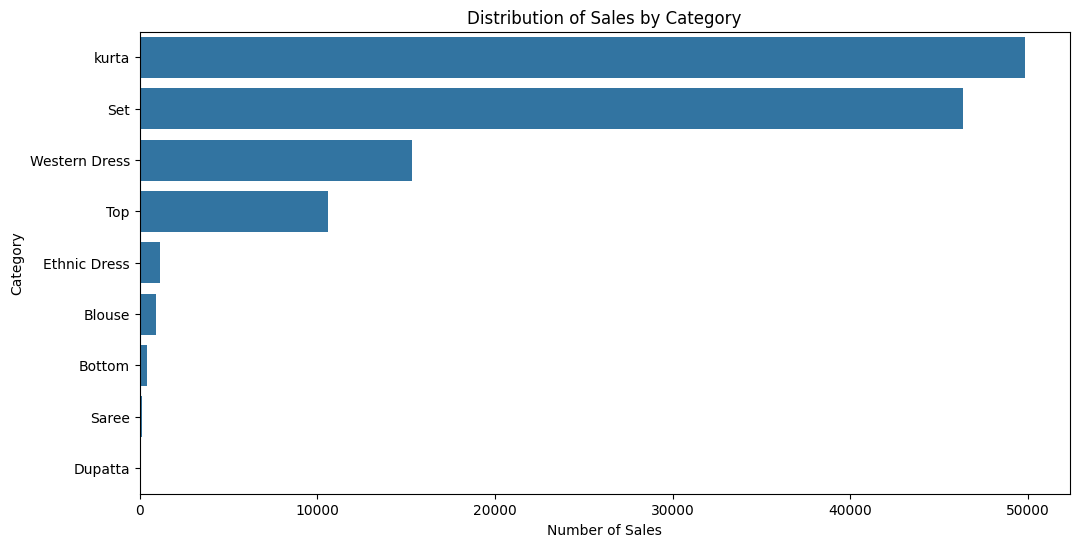

In [ ]:
# Distribution of Sales by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of Sales by Category')
plt.xlabel('Number of Sales')
plt.ylabel('Category')
plt.show()

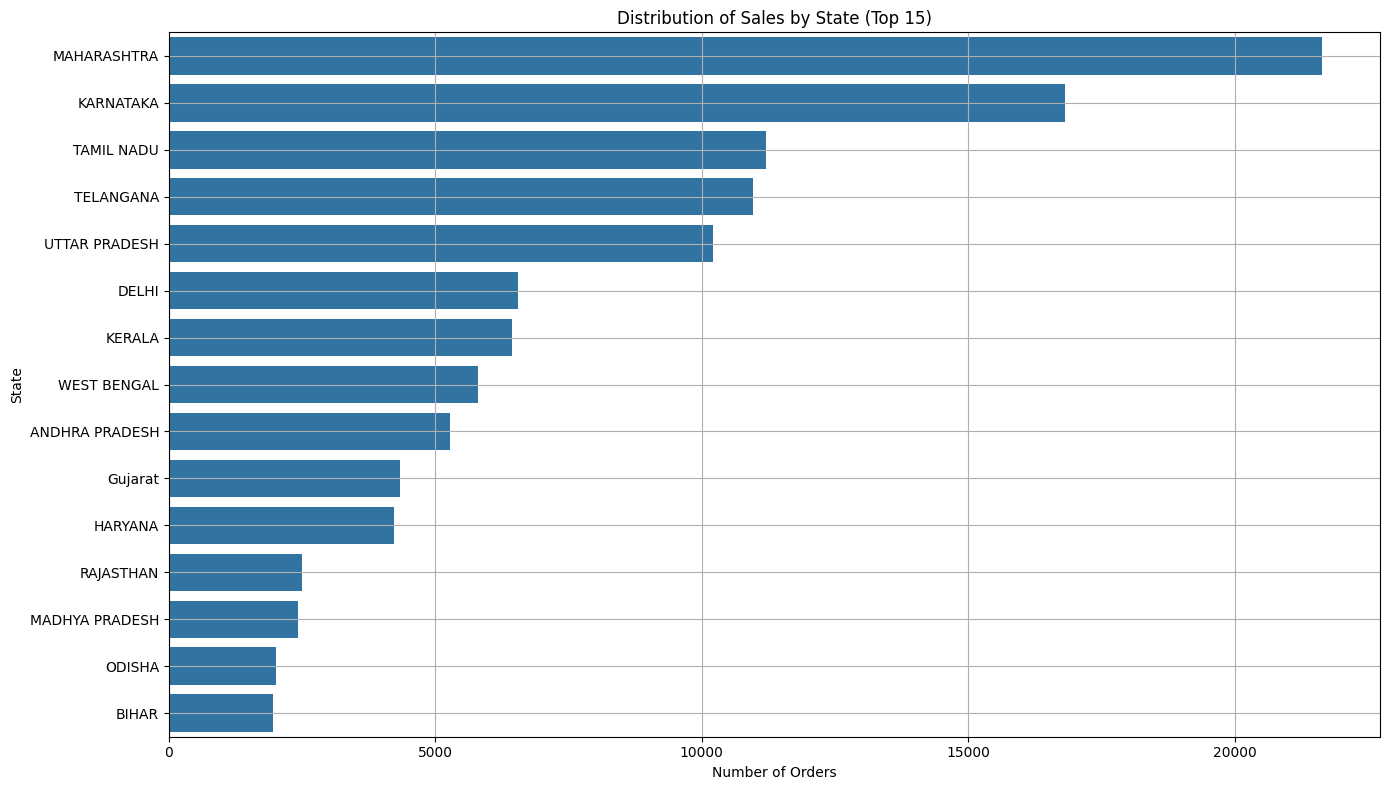

In [ ]:
# Plot sales distribution by state
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='ship-state', order=df['ship-state'].value_counts().index[:15])
plt.title('Distribution of Sales by State (Top 15)')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.grid(True)
plt.tight_layout()
plt.show()

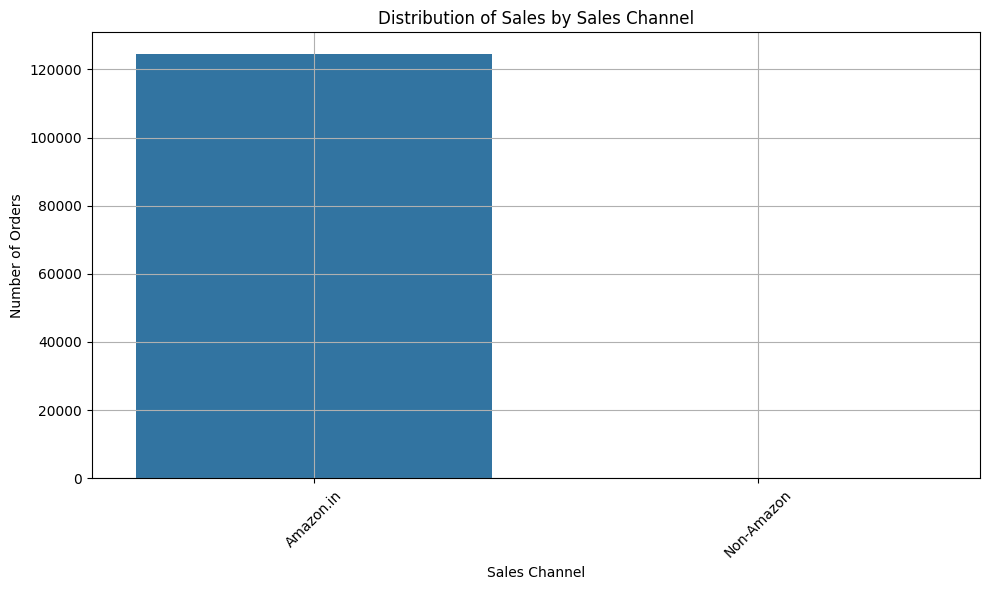

In [ ]:
# Distribution of Sales Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sales Channel', order=df['Sales Channel'].value_counts().index)
plt.title('Distribution of Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

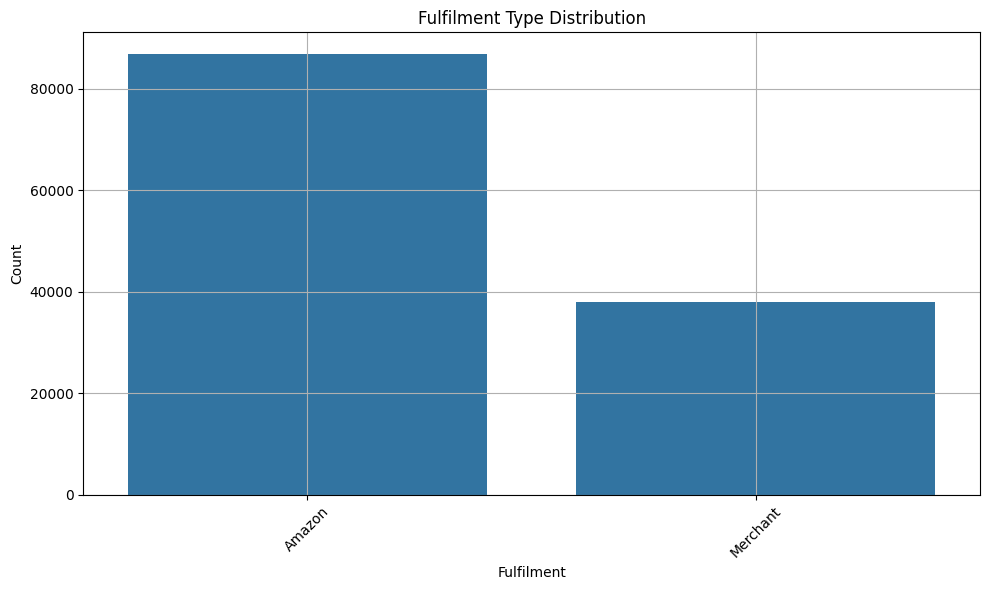

In [ ]:
# Distribution of Fulfillment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fulfilment', order=df['Fulfilment'].value_counts().index)
plt.title('Fulfilment Type Distribution')
plt.xlabel('Fulfilment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

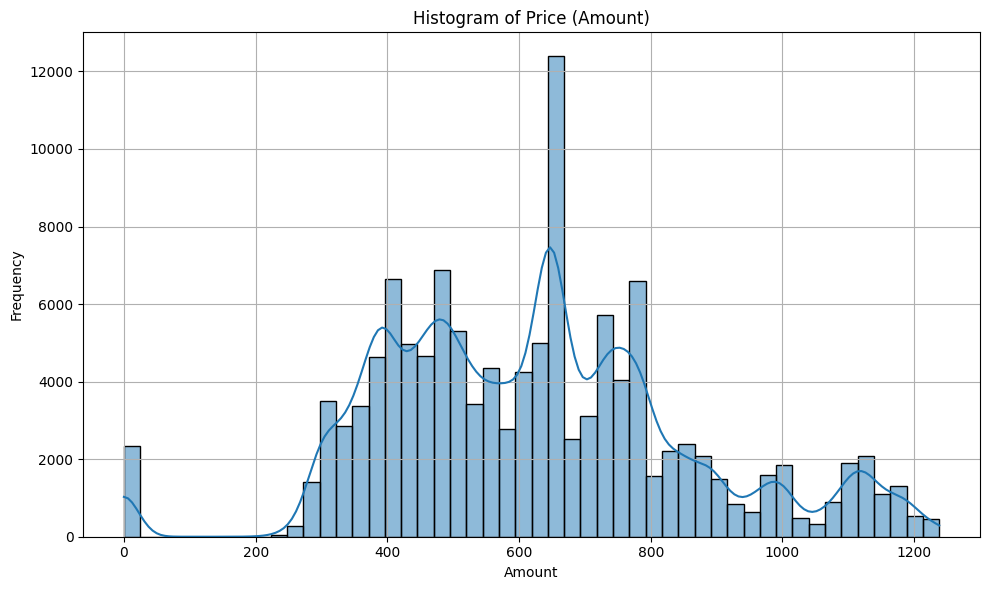

In [ ]:
# Plot histogram of Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', bins=50, kde=True)
plt.title('Histogram of Price (Amount)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2️⃣Bivariate Analysis

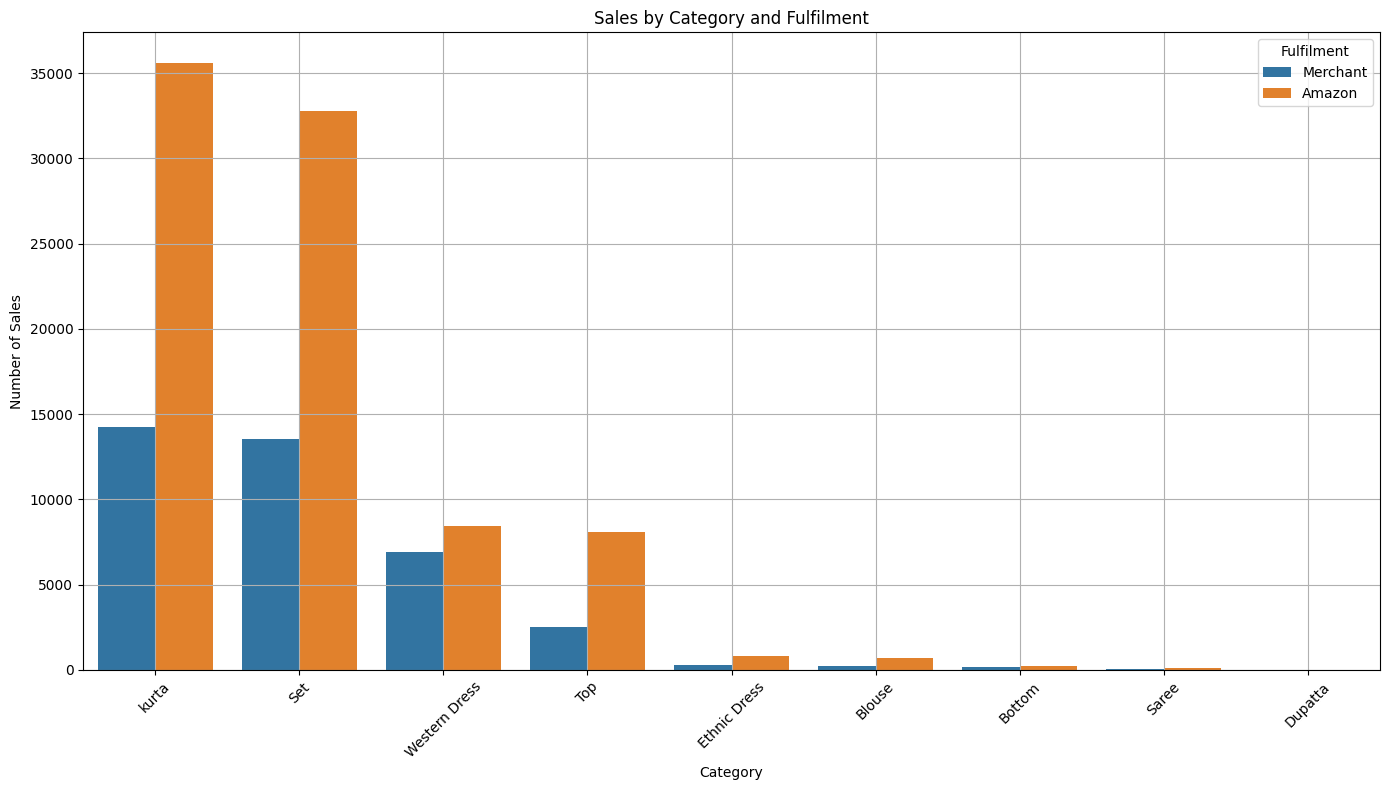

In [ ]:
# Sales by Category and Fulfillment
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Category', hue='Fulfilment', order=df['Category'].value_counts().index)
plt.title('Sales by Category and Fulfilment')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

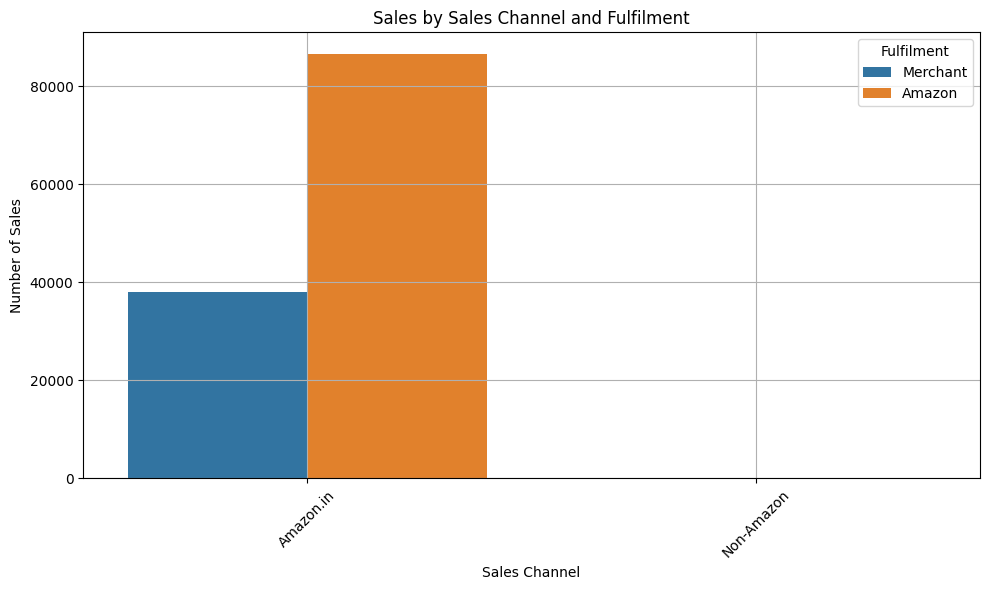

In [ ]:
# Grouped bar plot: Sales count by Sales Channel and Fulfilment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sales Channel', hue='Fulfilment', order=df['Sales Channel'].value_counts().index)
plt.title('Sales by Sales Channel and Fulfilment')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

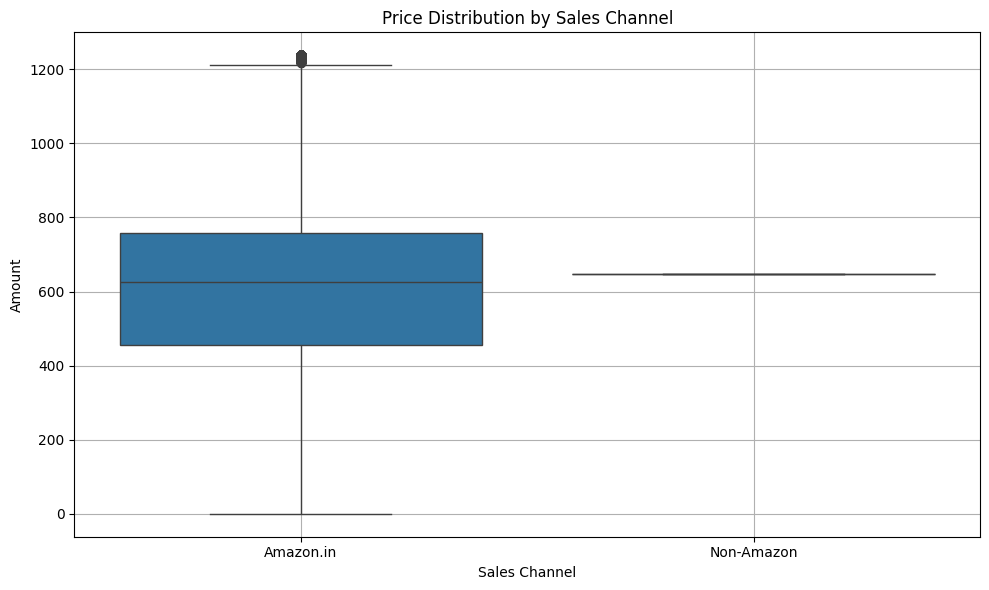

In [ ]:
# Boxplot of Amount by Sales Channel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales Channel', y='Amount')
plt.title('Price Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

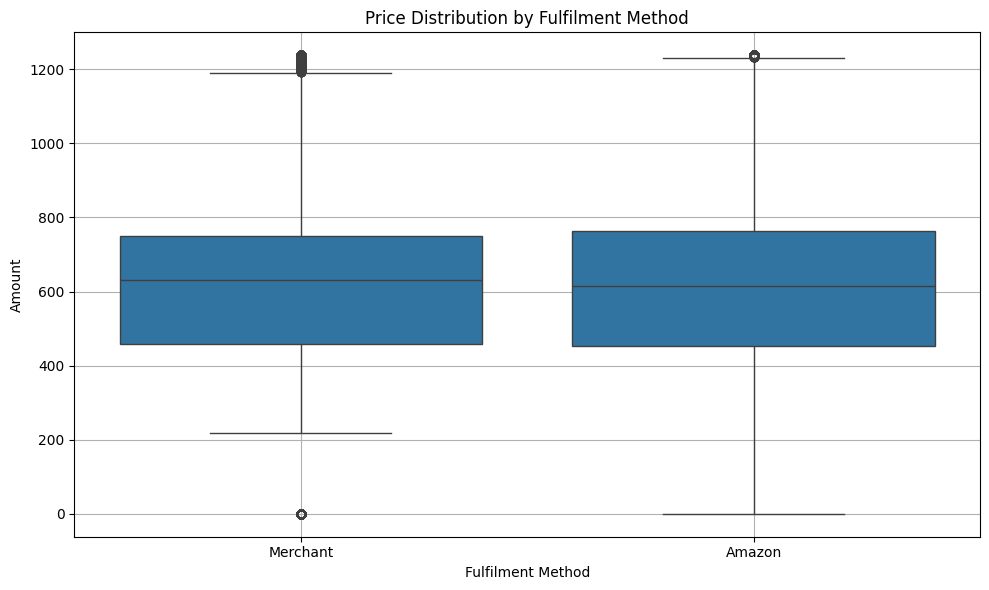

In [ ]:
# Boxplot of Amount by Fulfilment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fulfilment', y='Amount')
plt.title('Price Distribution by Fulfilment Method')
plt.xlabel('Fulfilment Method')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 🔢Multivariate Analysis

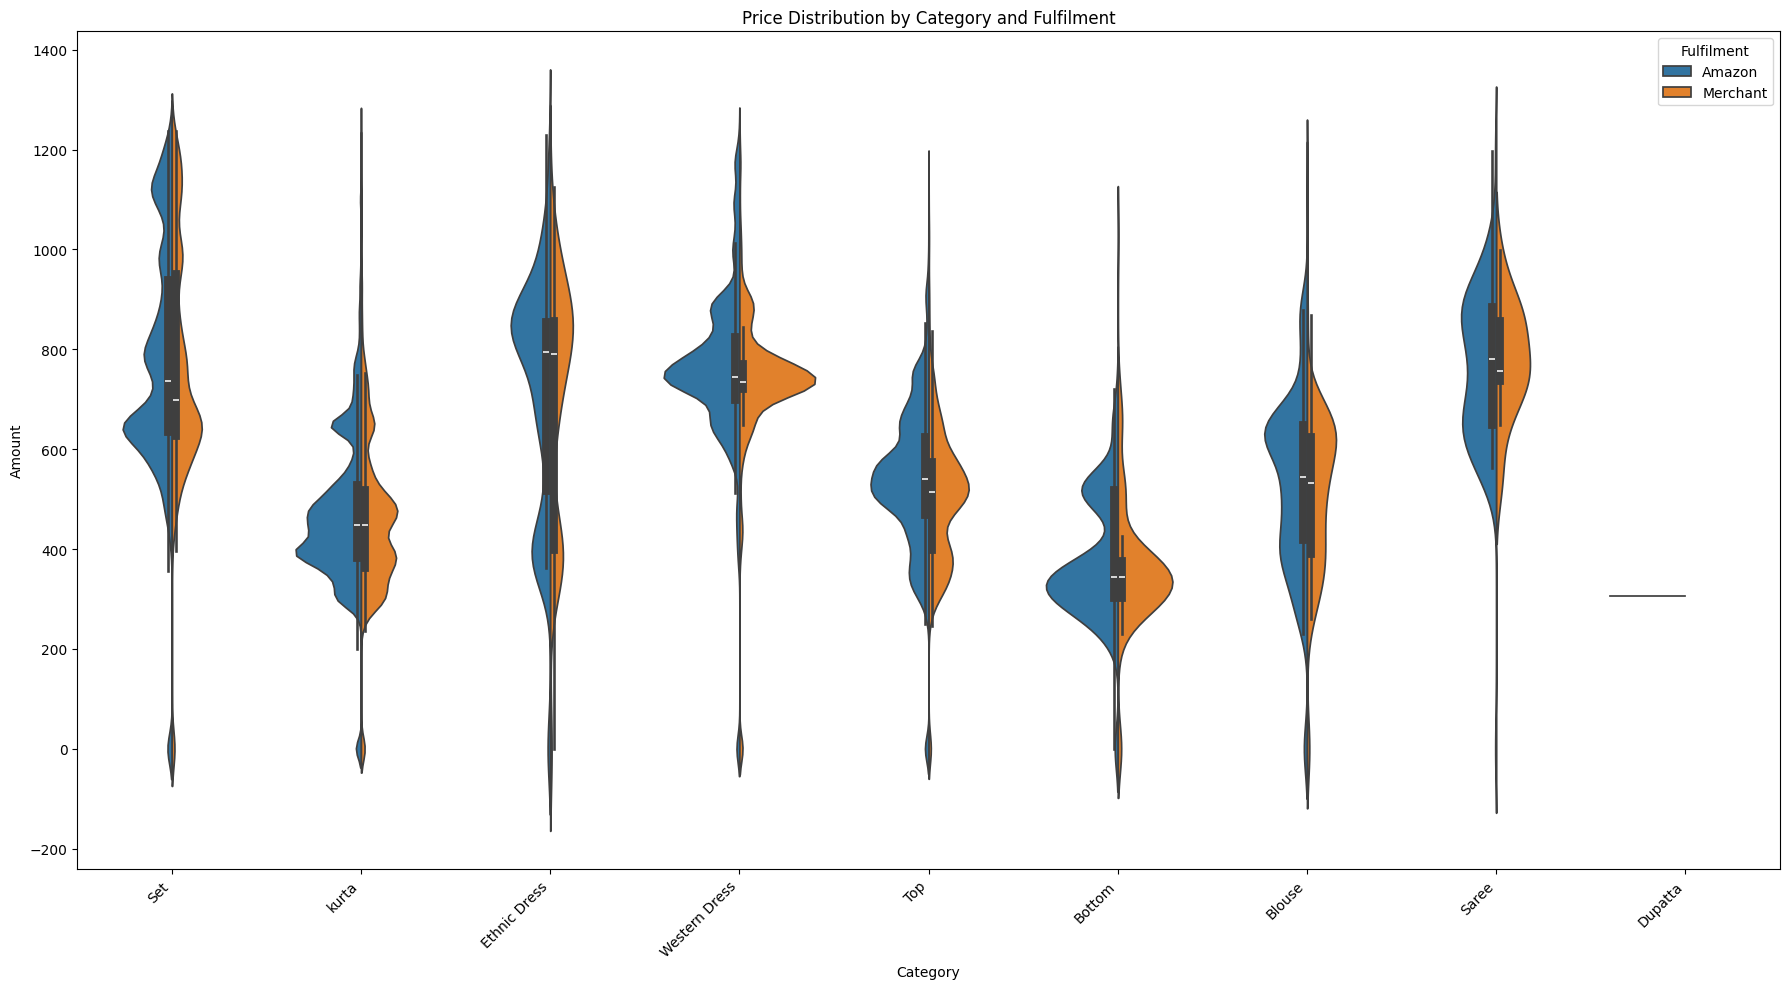

In [ ]:
# Example: Violin plot of Price by Category and Fulfillment
plt.figure(figsize=(18, 10))
sns.violinplot(
    data=df.sample(n=100000, random_state=42),
    x='Category',
    y='Amount',  # Fixed: use correct column name
    hue='Fulfilment',  # Make sure spelling matches your dataset
    split=True
)
plt.title('Price Distribution by Category and Fulfilment')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fulfilment')
plt.tight_layout()
plt.show()

### 🎡FEATURE ENGINEERING

In [ ]:
# Split Features and Target

# Separate target and features
target = 'Amount'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()
# Show all numerical columns
df[numerical_cols]

,Qty,Amount
0,1,406.0
1,1,399.0
2,1,399.0
3,1,771.0
4,1,544.0
...,...,...
29393,1,386.0
29394,1,999.0
29395,1,854.0
29396,1,518.0


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Show all categorical columns
df[categorical_cols]

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-state,ship-country,fulfilled-by
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,INR,KARNATAKA,IN,Easy Ship
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,S,Shipped,INR,TELANGANA,IN,Easy Ship
2,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,XS,Shipped,INR,MAHARASHTRA,IN,Easy Ship
3,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,L,Shipped,INR,MAHARASHTRA,IN,Easy Ship
4,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,6XL,Shipped,INR,ANDHRA PRADESH,IN,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...
29393,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,S,Shipped,INR,MAHARASHTRA,IN,Easy Ship
29394,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Ethnic Dress,S,Shipped,INR,ANDHRA PRADESH,IN,Easy Ship
29395,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,S,Shipped,INR,ANDHRA PRADESH,IN,Easy Ship
29396,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Top,M,Shipped,INR,UTTAR PRADESH,IN,Easy Ship


In [ ]:
# Define low-cardinality categorical columns
label_encode_cols = ['Fulfilment']

# Initialize encoded categorical DataFrame
encoded_cat_df = pd.DataFrame(index=X.index)

# Apply Label Encoding
for col in label_encode_cols:
    le = LabelEncoder()
    encoded_cat_df[col + '_Label'] = le.fit_transform(X[col])
    categorical_cols.remove(col)

In [ ]:
# One-Hot Encode Remaining Categorical Columns
# Remaining nominal columns for One-Hot Encoding
remaining_cat_cols = [col for col in categorical_cols if col not in label_encode_cols]

if remaining_cat_cols:
    ohe = ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_array = ohe.fit_transform(X[remaining_cat_cols])
    encoded_names = ohe.get_feature_names_out(remaining_cat_cols)
    one_hot_df = pd.DataFrame(encoded_array, columns=encoded_names, index=X.index)

    # Append to encoded_cat_df
    encoded_cat_df = pd.concat([encoded_cat_df, one_hot_df], axis=1)

In [ ]:
encoded_num_df = X[numerical_cols].copy()

In [ ]:
# Combine Encoded num_df and Encoded cat_df
final_X = pd.concat([encoded_num_df, encoded_cat_df], axis=1)

## 💥2.MODEL TRAINING

In [ ]:
# Define input features (X) and target variable (y)
# Define features and target
X = final_X
y = df['Amount']

In [ ]:
# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MLP Model Training
#mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=200, early_stopping=True, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), random_state=42)

## 💹3.MODEL SELECTION

In [ ]:
# Define param distributions (not full grid)
# Light RandomizedSearch
param_dist = {
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant']
}

search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=3,  # just 3 trials
    cv=2,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=2,
                   estimator=MLPRegressor(early_stopping=True,
                                          hidden_layer_sizes=(64, 32),
                                          random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'learning_rate': ['constant']},
                   random_state=42, scoring='r2')

## 🏭4.MODEL BUILDING

In [ ]:
# Define the MLP pipeline
mlp_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Standardizes input features
    ("mlp", MLPRegressor(max_iter=500, random_state=42))
])

## 🧾5.MODEL EVALUATION

 📊 Model Evaluation Insights

✅ MAE (Mean Absolute Error):
- **Definition**: Average difference between predicted and actual values.
- **Value**: ₹137.37
- ✅ **Lower is better** — This means the model is off by ₹137 on average.

✅ RMSE (Root Mean Squared Error):
- **Definition**: Similar to MAE, but it **penalizes large errors more heavily**.
- **Value**: ₹193.71
- ✅ **Lower is better** — When accounting for large mistakes, the model is off by ₹193.

✅ R² Score (Coefficient of Determination):
- **Definition**: Measures how well the model explains the variance in the target variable.
- **Range**: 0 to 1
- **Value**: 0.38
- ⚠️ **Interpretation**:
  - A score of **0.38** means the model explains **38%** of the variation in the data.

In [ ]:
#Predict on Test Set
y_pred = search.best_estimator_.predict(X_test_scaled)

In [ ]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(137.37333835713872, np.float64(193.70694068233956), 0.3802795708232476)

In [ ]:
# Save Cleaned Data to CSV
df.to_csv('cleaned_amazon_sales.csv', index=False)